<a href="https://colab.research.google.com/github/MelihKlc/Deep-Learning/blob/main/Conv_Neural_Network_with_Multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass image classification

We have just been through a bunch of the following steps with a binary classification problem. Now we are going to step things up a notch with 10 classes of food (multiclass)

1. Become one with the data.
2. Preprocess the data (get it ready for model).
3. Create a model (start with baseline).
4. Fit the model (overfit it to make sure it works).
5. Evaluate the model.
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting.
7. Repeat until satisfied

# Import and become one with the data

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()


--2023-08-05 12:13:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.120.128, 142.250.159.128, 142.251.120.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.120.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  91.3MB/s    in 4.4s    

2023-08-05 12:13:14 (112 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
# Setup the train and test set directories
import pathlib
import numpy as np
data_dir = pathlib.Path("10_food_classes_all_data/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*") ]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [3]:
#Visualize our train images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir , target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder ) , 1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)
  print(f"image shape : {img.shape}")
  return img


['2622458.jpg']
image shape : (384, 512, 3)


array([[[100, 108, 111],
        [102, 110, 113],
        [105, 113, 116],
        ...,
        [163, 155, 136],
        [162, 153, 136],
        [161, 152, 135]],

       [[153, 162, 167],
        [154, 163, 168],
        [156, 165, 170],
        ...,
        [157, 149, 130],
        [156, 147, 130],
        [156, 147, 130]],

       [[171, 186, 193],
        [172, 187, 194],
        [174, 189, 196],
        ...,
        [161, 154, 135],
        [161, 152, 135],
        [160, 151, 134]],

       ...,

       [[171, 180, 179],
        [172, 182, 181],
        [207, 217, 218],
        ...,
        [ 81,  78,  87],
        [ 78,  75,  84],
        [ 90,  87,  96]],

       [[185, 195, 196],
        [201, 211, 212],
        [211, 221, 222],
        ...,
        [ 80,  77,  86],
        [ 92,  89,  98],
        [130, 127, 136]],

       [[175, 185, 186],
        [200, 210, 211],
        [186, 197, 199],
        ...,
        [ 86,  83,  92],
        [118, 115, 124],
        [181, 178, 187]]

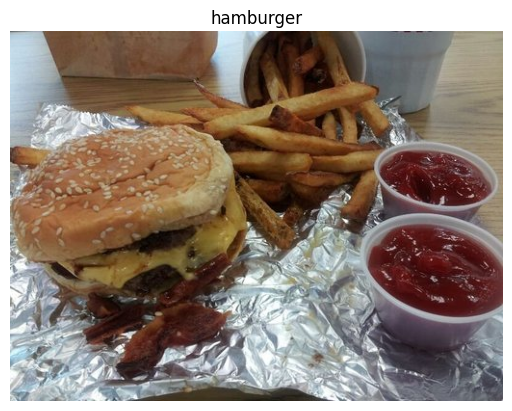

In [4]:
view_random_image(target_dir = "/content/10_food_classes_all_data/train/" , target_class = "hamburger")

# All process:

1. Load our images.
2. Preprocess our images.
3. Build a CNN.
4. Compile a CNN.
5. Fit the CNN

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

train_datagen = ImageDataGenerator(rescale = 1./255
                                       )
test_datagen = ImageDataGenerator(rescale = 1./255)

train_data = train_datagen.flow_from_directory(directory = train_dir ,
                                               target_size = (224,224) ,
                                               batch_size = 32 ,
                                               class_mode = "categorical"
                                               )

test_data = test_datagen.flow_from_directory( directory = test_dir ,
                                             target_size = (224,224) ,
                                              batch_size = 32 ,
                                              class_mode = "categorical"
                                              )



Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [6]:
tf.random.set_seed(42)

cnn = tf.keras.Sequential(
    [
     tf.keras.layers.Conv2D(filters = 64 ,
                            activation = "relu" ,
                            input_shape = (224,224,3) ,
                            kernel_size = 3
                            )   ,
     tf.keras.layers.Conv2D(64 , 3 , activation = "relu") ,
     tf.keras.layers.MaxPool2D(pool_size = 2 ,
                               padding = "valid"
                               ) ,
      tf.keras.layers.Conv2D(64 , 3 , activation = "relu") ,
      tf.keras.layers.Conv2D(64 , 3 , activation = "relu") ,
      tf.keras.layers.MaxPool2D() ,
     tf.keras.layers.Flatten() ,
     tf.keras.layers.Dense(10 , activation = "softmax")
    ]

)
cnn.compile(loss = ["categorical_crossentropy"] ,
            optimizer = tf.keras.optimizers.Adam() ,
            metrics = ["accuracy"]
            )

hist = cnn.fit(train_data , epochs = 5 , steps_per_epoch = len(train_data) , validation_data = test_data , validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 60s 188ms/step - loss: 2.3054 - accuracy: 0.1148 - val_loss: 2.2791 - val_accuracy: 0.1644
Epoch 2/5
235/235 [==============================] - 45s 190ms/step - loss: 2.1735 - accuracy: 0.2137 - val_loss: 2.1102 - val_accuracy: 0.2432
Epoch 3/5
235/235 [==============================] - 44s 188ms/step - loss: 1.7101 - accuracy: 0.4180 - val_loss: 2.1287 - val_accuracy: 0.2652
Epoch 4/5
235/235 [==============================] - 46s 195ms/step - loss: 0.7915 - accuracy: 0.7407 - val_loss: 3.4392 - val_accuracy: 0.2180
Epoch 5/5
235/235 [==============================] - 49s 209ms/step - loss: 0.2092 - accuracy: 0.9377 - val_loss: 6.0293 - val_accuracy: 0.2168


In [7]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

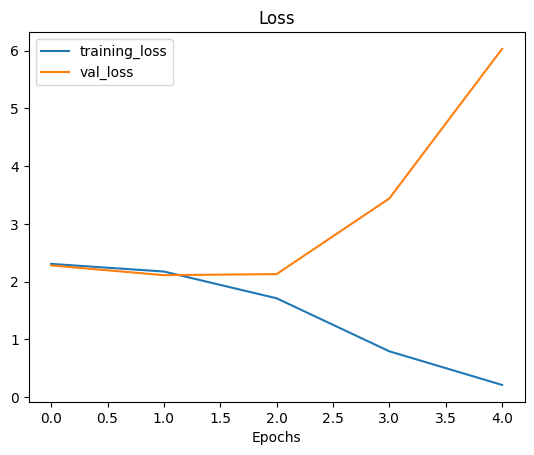

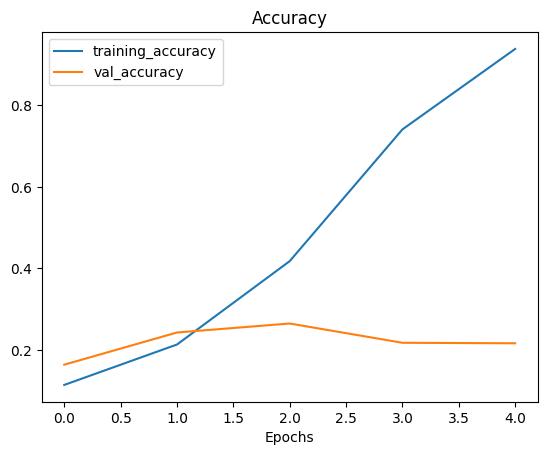

In [8]:
plot_loss_curves(hist)  #Overfitting oldu.

# Adjust the model parameters
Due to its performance on the training data, it's clear our model is learning something. However, performing well on the training data is like going well in the classroom but failing to use your skills in real life.

Ideally, we'd like our model to perform as well on the test data as it does on the training data.

So our next steps will be to try and prevent our model overfitting. A couple of ways to prevent overfitting include:

1. Get more data - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.

2. Simplify model - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.


3. Use data augmentation - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.

4. Use transfer learning - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.
🔑 Note: Preventing overfitting is also referred to as regularization.

In [9]:
tf.random.set_seed(42)

cnn_2 = tf.keras.Sequential(
    [
     tf.keras.layers.Conv2D(filters = 10 ,
                            activation = "relu" ,
                            input_shape = (224,224,3) ,
                            kernel_size = 3
                            )   ,

     tf.keras.layers.MaxPool2D(pool_size = 2 ,
                               padding = "valid"
                               ) ,
      tf.keras.layers.Conv2D(10 , 3 , activation = "relu") ,

      tf.keras.layers.MaxPool2D() ,
     tf.keras.layers.Flatten() ,
     tf.keras.layers.Dense(10 , activation = "softmax")
    ]

)
cnn_2.compile(loss = ["categorical_crossentropy"] ,
            optimizer = tf.keras.optimizers.Adam() ,
            metrics = ["accuracy"]
            )

hist_2 = cnn_2.fit(train_data , epochs = 5 , steps_per_epoch = len(train_data) , validation_data = test_data , validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 30s 119ms/step - loss: 2.2042 - accuracy: 0.2197 - val_loss: 1.9975 - val_accuracy: 0.2852
Epoch 2/5
235/235 [==============================] - 27s 116ms/step - loss: 1.8632 - accuracy: 0.3532 - val_loss: 2.0571 - val_accuracy: 0.2940
Epoch 3/5
235/235 [==============================] - 28s 117ms/step - loss: 1.5538 - accuracy: 0.4860 - val_loss: 2.0299 - val_accuracy: 0.2968
Epoch 4/5
235/235 [==============================] - 27s 115ms/step - loss: 1.1168 - accuracy: 0.6343 - val_loss: 2.2421 - val_accuracy: 0.2876
Epoch 5/5
235/235 [==============================] - 27s 116ms/step - loss: 0.6871 - accuracy: 0.7916 - val_loss: 2.6675 - val_accuracy: 0.2592


In [10]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 64)       0         
 2D)                                                    

In [11]:
cnn_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

#Trainable parameter çok değişmiyor modelimizden conv layer eksiltmemize rağmen. Burdan da yine overfitting olacağı çıkarımını yapabiliyoruz. (ilk modelde filter 64 oldugu icin cok büyük cıktı parametre normalde onda da 10 filtre kullansam cok yakın cıkacaktı.)

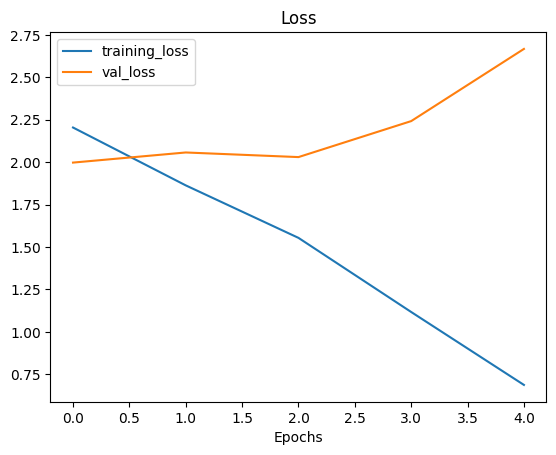

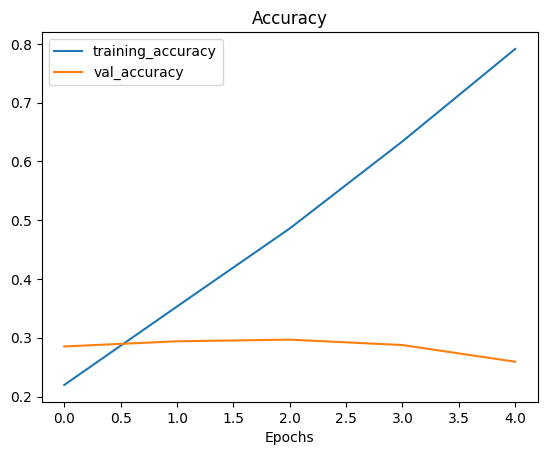

In [12]:
plot_loss_curves(hist_2)

# Conv layer sildik işe yaramadı. Data augmentation yapıcaz.

In [13]:
train_datagen_aug = ImageDataGenerator(rescale = 1./255 ,
                                       rotation_range = 0.2 ,
                                       width_shift_range = 0.2 ,
                                       height_shift_range = 0.2 ,
                                       shear_range = 0.2 ,
                                       zoom_range = 0.2 ,
                                       horizontal_flip = True
                                       )
test_datagen = ImageDataGenerator(rescale = 1./255)

train_data_aug = train_datagen_aug.flow_from_directory(directory = train_dir ,
                                               target_size = (224,224) ,
                                               batch_size = 32 ,
                                               class_mode = "categorical"
                                               )

test_data = test_datagen.flow_from_directory( directory = test_dir ,
                                             target_size = (224,224) ,
                                              batch_size = 32 ,
                                              class_mode = "categorical"
                                              )

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [14]:
tf.random.set_seed(42)

cnn_3 = tf.keras.Sequential(
    [
     tf.keras.layers.Conv2D(filters = 10 ,
                            activation = "relu" ,
                            input_shape = (224,224,3) ,
                            kernel_size = 3
                            )   ,
     tf.keras.layers.Conv2D(10 , 3 , activation = "relu") ,
     tf.keras.layers.MaxPool2D(pool_size = 2 ,
                               padding = "valid"
                               ) ,
      tf.keras.layers.Conv2D(10 , 3 , activation = "relu") ,
      tf.keras.layers.Conv2D(10 , 3 , activation = "relu") ,
      tf.keras.layers.MaxPool2D() ,
     tf.keras.layers.Flatten() ,
     tf.keras.layers.Dense(10 , activation = "softmax")
    ]

)
cnn_3.compile(loss = ["categorical_crossentropy"] ,
            optimizer = tf.keras.optimizers.Adam() ,
            metrics = ["accuracy"]
            )

hist_3 = cnn_3.fit(train_data_aug , epochs = 5 , steps_per_epoch = len(train_data) , validation_data = test_data , validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 108s 446ms/step - loss: 2.2240 - accuracy: 0.1768 - val_loss: 2.0570 - val_accuracy: 0.2440
Epoch 2/5
235/235 [==============================] - 105s 446ms/step - loss: 2.1100 - accuracy: 0.2381 - val_loss: 2.0123 - val_accuracy: 0.2756
Epoch 3/5
235/235 [==============================] - 101s 432ms/step - loss: 2.0528 - accuracy: 0.2700 - val_loss: 1.9181 - val_accuracy: 0.3392
Epoch 4/5
235/235 [==============================] - 101s 431ms/step - loss: 2.0128 - accuracy: 0.2913 - val_loss: 1.8813 - val_accuracy: 0.3368
Epoch 5/5
235/235 [==============================] - 101s 428ms/step - loss: 1.9574 - accuracy: 0.3172 - val_loss: 1.8167 - val_accuracy: 0.3716


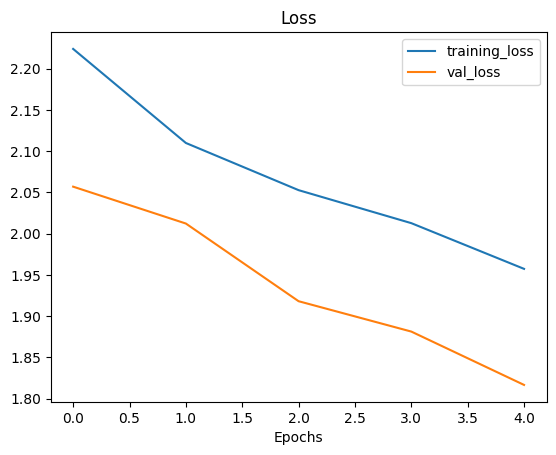

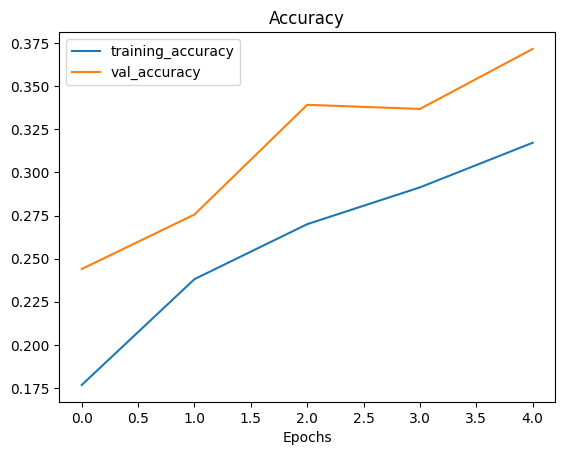

In [15]:
plot_loss_curves(hist_3)

# Making a prediction with custom images

In [16]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg

--2023-08-05 12:29:54--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg.1’

03-hamburger.jpeg.1 100%[===================>]   3.40M  --.-KB/s    in 0.07s   

2023-08-05 12:29:54 (49.6 MB/s) - ‘03-hamburger.jpeg.1’ saved [3564285/3564285]



In [17]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2023-08-05 12:29:54--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1725178 (1.6M) [image/jpeg]
Saving to: ‘03-sushi.jpeg.1’

03-sushi.jpeg.1     100%[===================>]   1.64M  --.-KB/s    in 0.06s   

2023-08-05 12:29:54 (28.6 MB/s) - ‘03-sushi.jpeg.1’ saved [1725178/1725178]



In [22]:
# Create a function to import and image and resize it to be able to be used with our neural network.
def load_and_prep_img(filename , img_shape = 224):
  """
  Reads an image from filename , turns it into a tensor and reshapes it to (img_shape , img_shape , color_channels).
  """
  #Read in the image
  img = tf.io.read_file(filename)  #filename parametresi ile belirtilen görüntü dosyasını tf.io.read_file işleviyle okur ve bir baytlar dizisi olarak depolar.

  #Decode the read file into a tensor
  img = tf.image.decode_image(img)  #tf.image.decode_image işlevini kullanarak, baytlar dizisini TensorFlow tensörüne dönüştürür. Bu, görüntü dosyasının içeriğini anlamlandırma ve uygun formata getirme işlemini gerçekleştirir.

  #Resize the image
  img = tf.image.resize( img , size = [img_shape , img_shape])

  #Rescale the image (get all values between 0 and 1)
  img = img/255.

  return img

In [28]:
# Reconfig our pred_and_plot function to work with the multiclass images. Because our first function can apply just for binary classification.

def pred_and_plot(model , filename , class_names = class_names):
  """
  Imports an image located at filename , makes a prediction with model and plots the image with the predicted class as the title
  """

  #Import the target image and preprocess in
  img = load_and_prep_img(filename)

  #Make a prediction
  pred = model.predict(tf.expand_dims(img , axis = 0))

  # Add in logic for multiclass and get pred_class name

  if len(pred[0]) > 1 :
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class =  class_names[int(tf.round(pred[0]))]

  #Plot the image and predicted class names
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 31ms/step


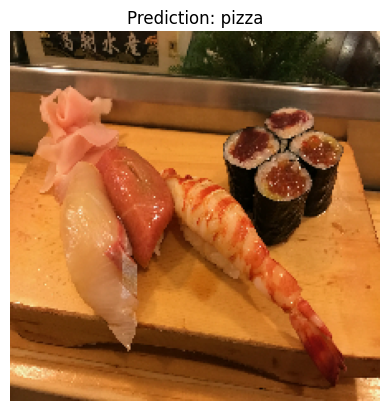

In [29]:
pred_and_plot( model = cnn_3 , filename = "03-sushi.jpeg.1" , class_names = class_names)

# Our model's predictions aren't very good, this is because it's only performing at ~35% accuracy on the test dataset.

We'll see how to improve this later on (spolier: transfer learning is going to step things up a notch).